# <p style="padding:10px;background-color:#f3ca20 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> EDA On Global Terrorism Database</p>

# **Import Libraries**

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# **Load and Explore the dataset**

In [ ]:
# Load the dataset
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
7311,197901090003,1979,1,9,NaN,0,NaN,138,Myanmar,5,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7312,197901090004,1979,1,9,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7313,197901090007,1979,1,9,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,1.0,1.0,NaN
7314,197901100001,1979,1,10,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7315,197901100002,1979,1,10,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [ ]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [ ]:
#Cheching the null values

df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            26
Region            0
city              0
latitude        183
longitude       183
AttackType        0
Killed          809
Wounded        2043
Target           66
Summary        6461
Group             1
Target_type       0
Weapon_type       1
Motive         6725
dtype: int64

In [ ]:
df.shape

(7316, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7316 non-null   int64  
 1   Month        7316 non-null   int64  
 2   Day          7316 non-null   int64  
 3   Country      7316 non-null   object 
 4   state        7290 non-null   object 
 5   Region       7316 non-null   object 
 6   city         7316 non-null   object 
 7   latitude     7133 non-null   float64
 8   longitude    7133 non-null   float64
 9   AttackType   7316 non-null   object 
 10  Killed       6507 non-null   float64
 11  Wounded      5273 non-null   float64
 12  Target       7250 non-null   object 
 13  Summary      855 non-null    object 
 14  Group        7315 non-null   object 
 15  Target_type  7316 non-null   object 
 16  Weapon_type  7315 non-null   object 
 17  Motive       591 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

In [ ]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,6507.000000,5273.000000
mean,1975.003417,6.523237,15.129579,34.842112,-22.783191,0.785923,1.061255
std,2.675243,3.477868,9.053688,22.248928,52.465516,6.264323,7.851273
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000
25%,1973.000000,3.000000,7.000000,33.888523,-73.931351,0.000000,0.000000
50%,1976.000000,6.000000,15.000000,41.106178,-5.956210,0.000000,0.000000
75%,1977.000000,10.000000,23.000000,48.856644,9.407588,1.000000,0.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000


In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979      64
Name: Year, dtype: int64

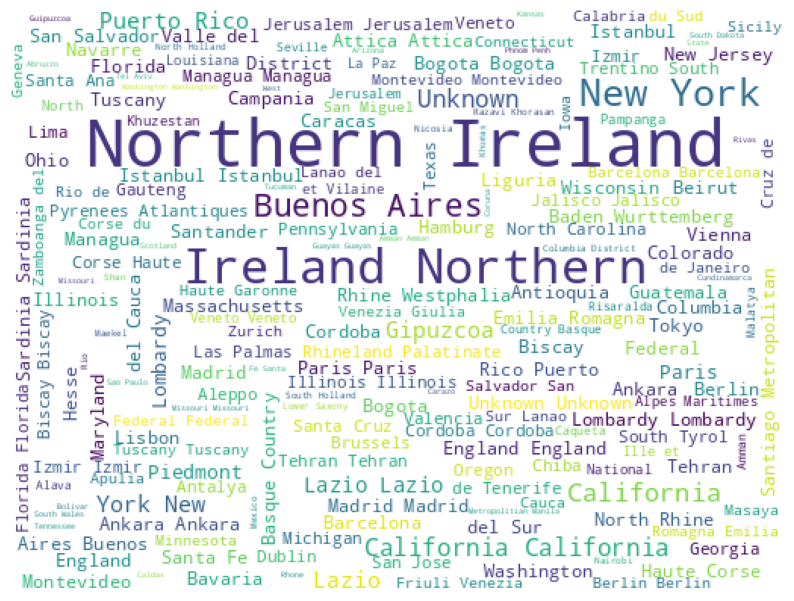

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# **Data Visualization**

# People Killed and Wounded In Each Year

In [ ]:
b=df[["Year","Wounded"]].groupby("Year").sum()
b.head()


,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


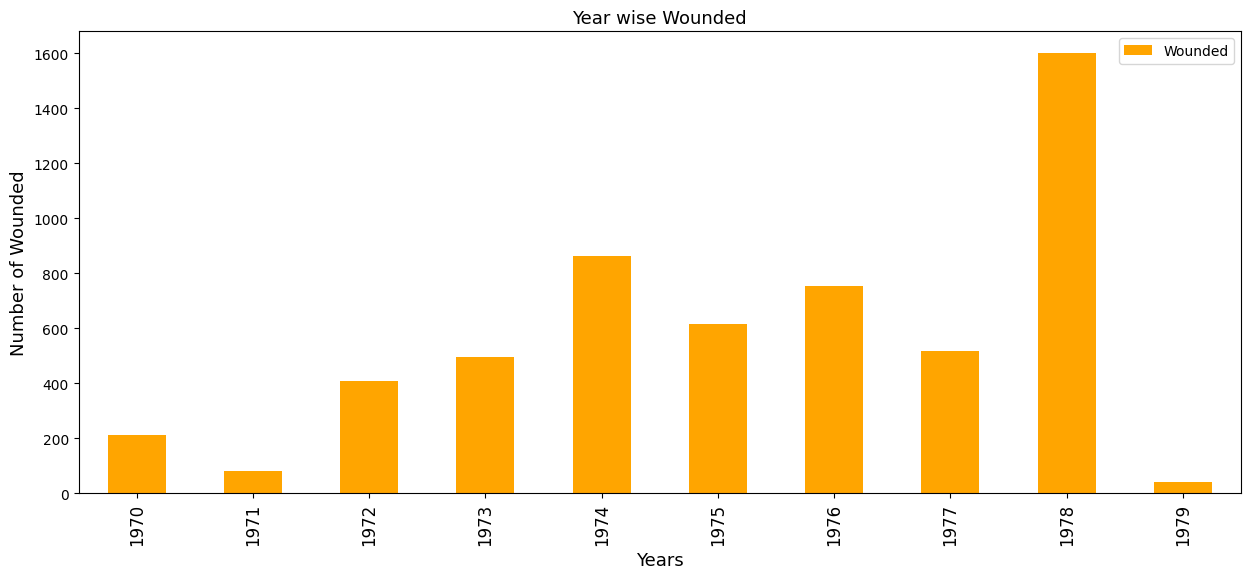

In [ ]:
b.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()



In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [ ]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()


,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

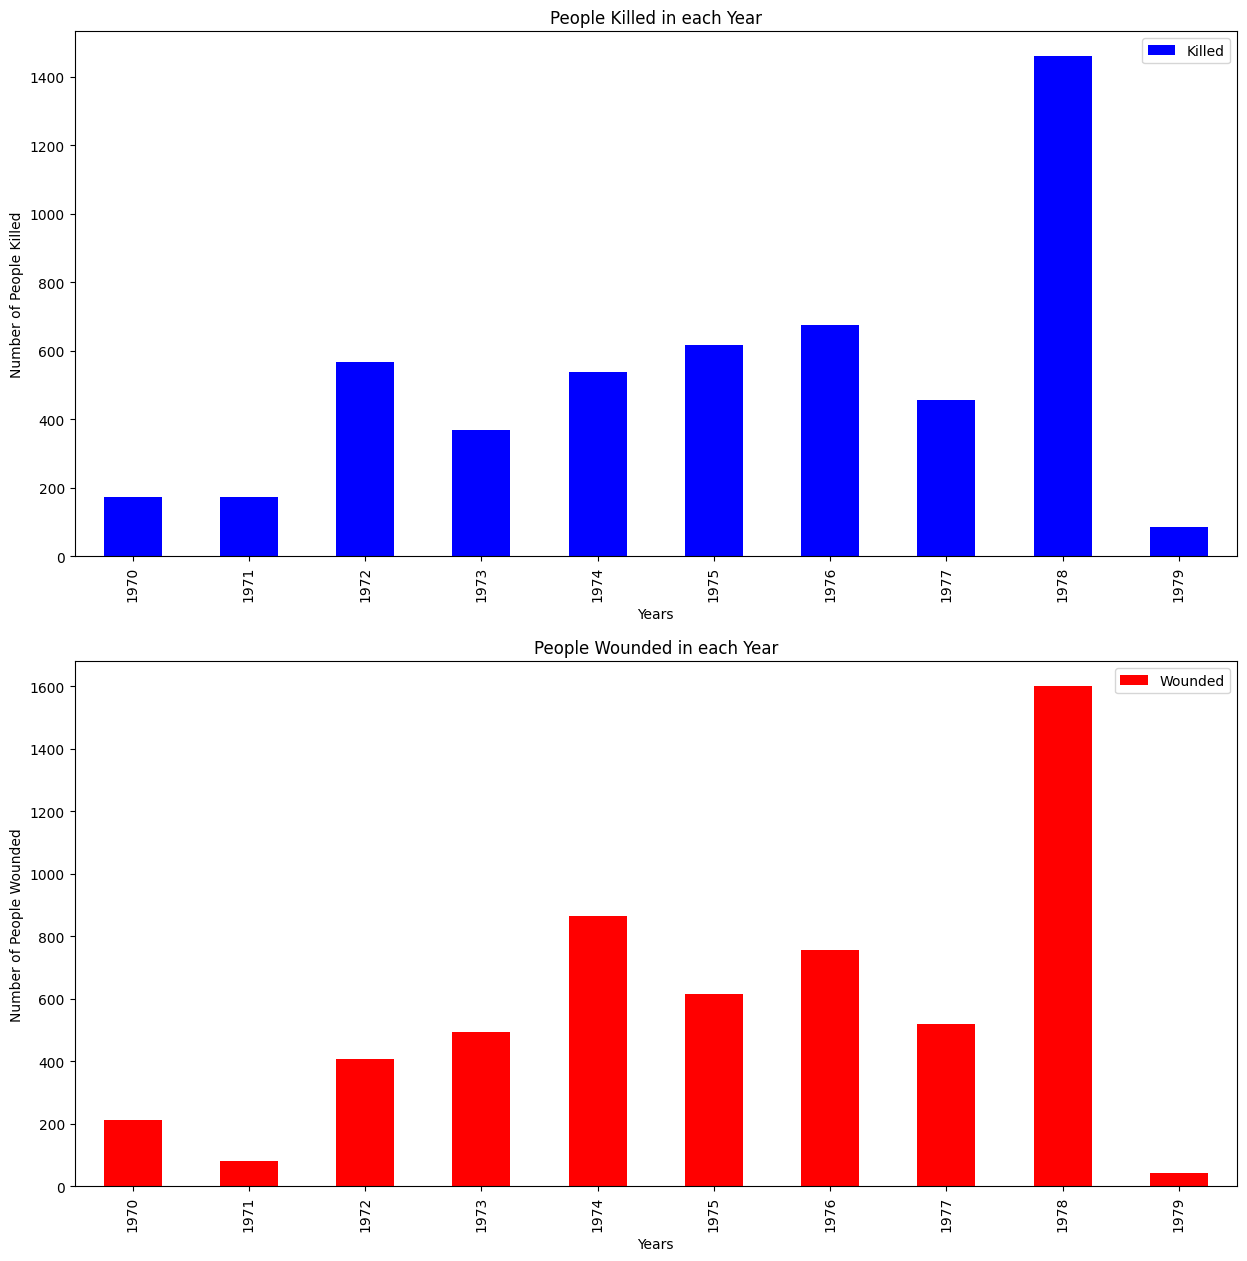

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="red",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")


# Number of Terrorist Activities each Year

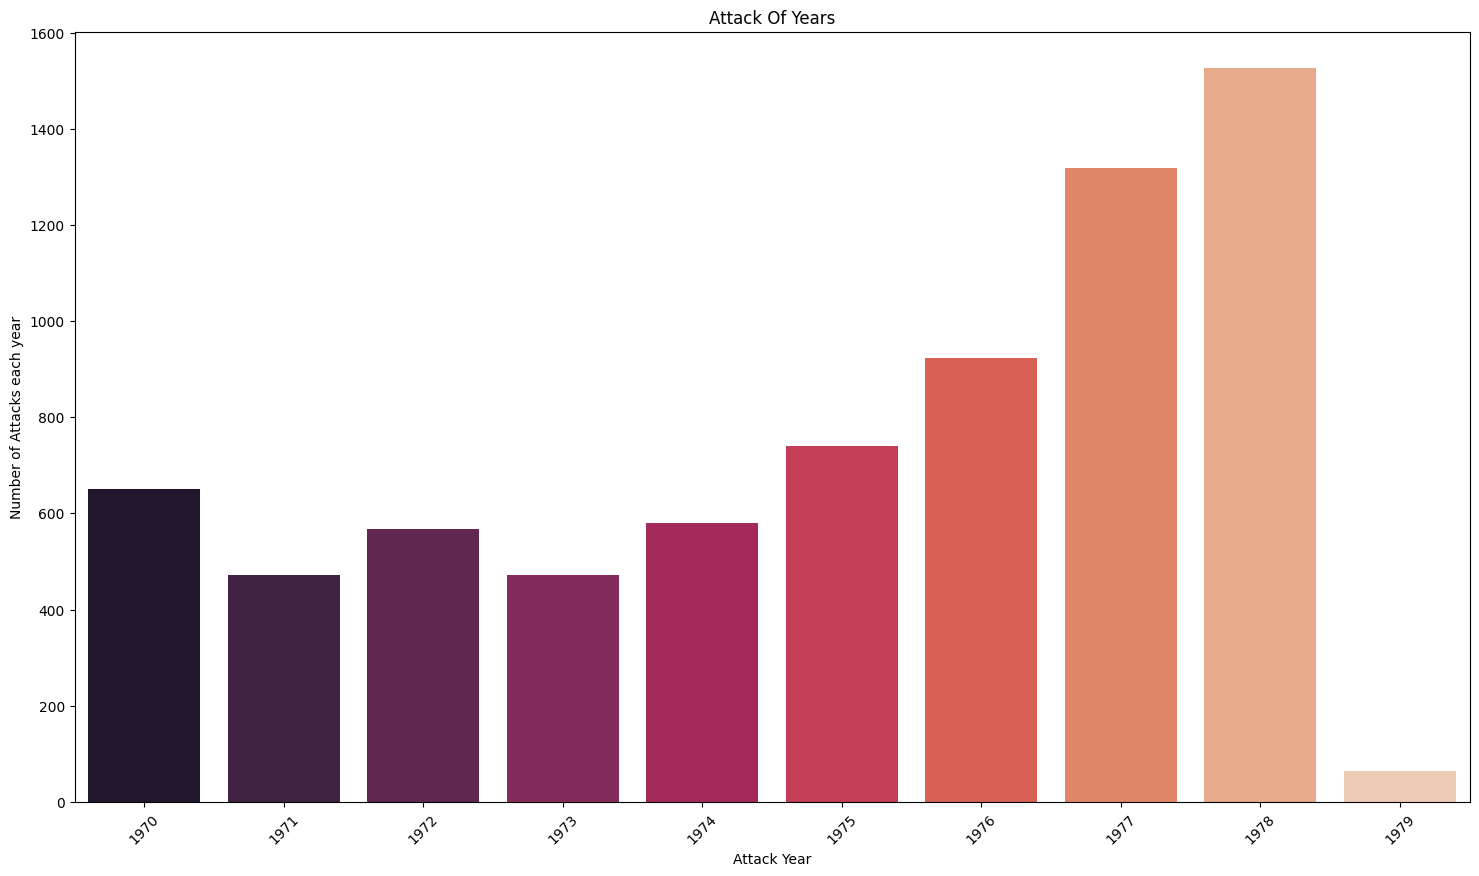

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

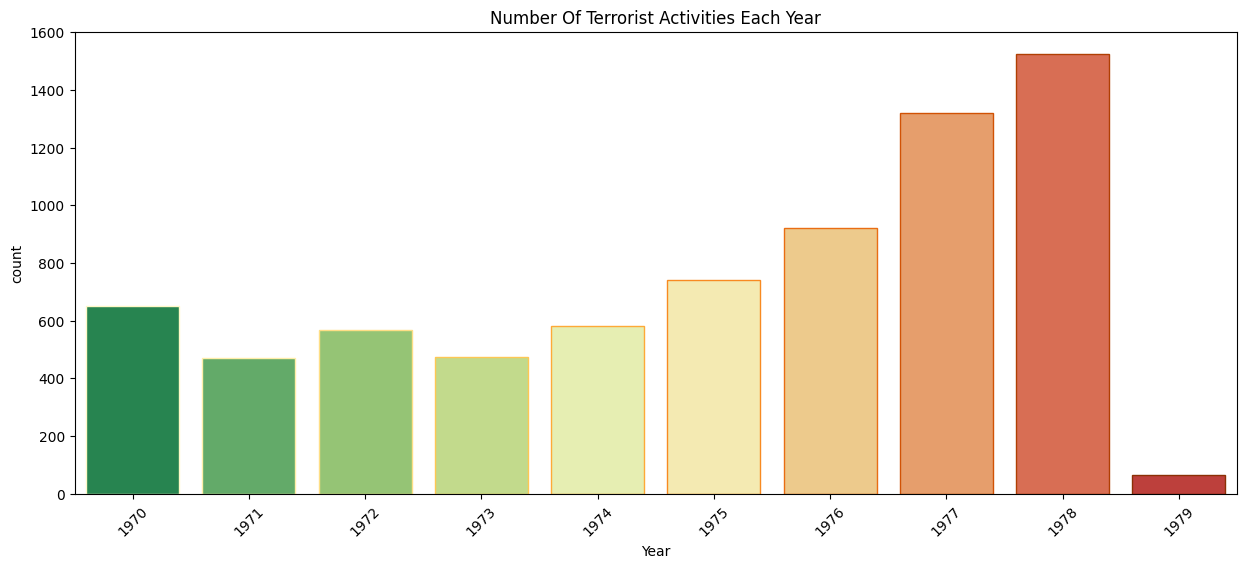

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')


# Terrorist Activities by Region in each Year through Area Plot

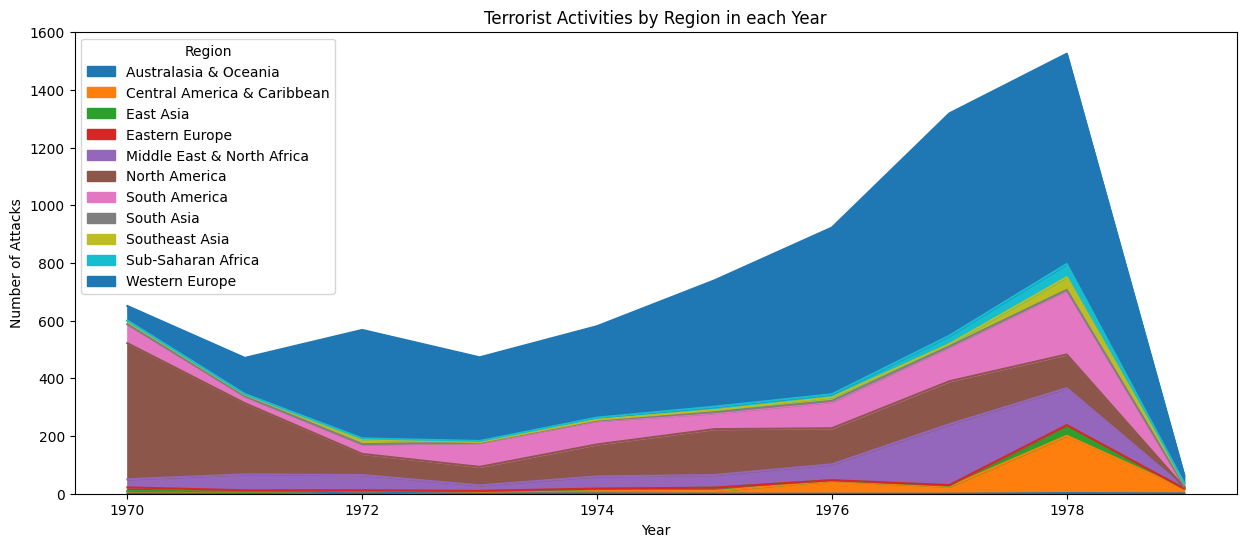

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()



In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

# Heatmap

In [ ]:
t1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=t1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1970,1972,1973,1974,1975,1976,1977,1978
Country,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,92.0,52.5,0.0,0.0
Barbados,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0
Greece,0.0,0.0,60.0,88.0,0.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0
Iraq,0.0,0.0,0.0,0.0,0.0,295.0,0.0,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)



In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()


Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
a=regt["Total"].sort_values(ascending=False)
a

Region
Western Europe                 3701
North America                  1517
South America                   778
Middle East & North Africa      639
Central America & Caribbean     325
Sub-Saharan Africa              120
Southeast Asia                  116
East Asia                        63
Eastern Europe                   25
South Asia                       17
Australasia & Oceania            15
Name: Total, dtype: int64

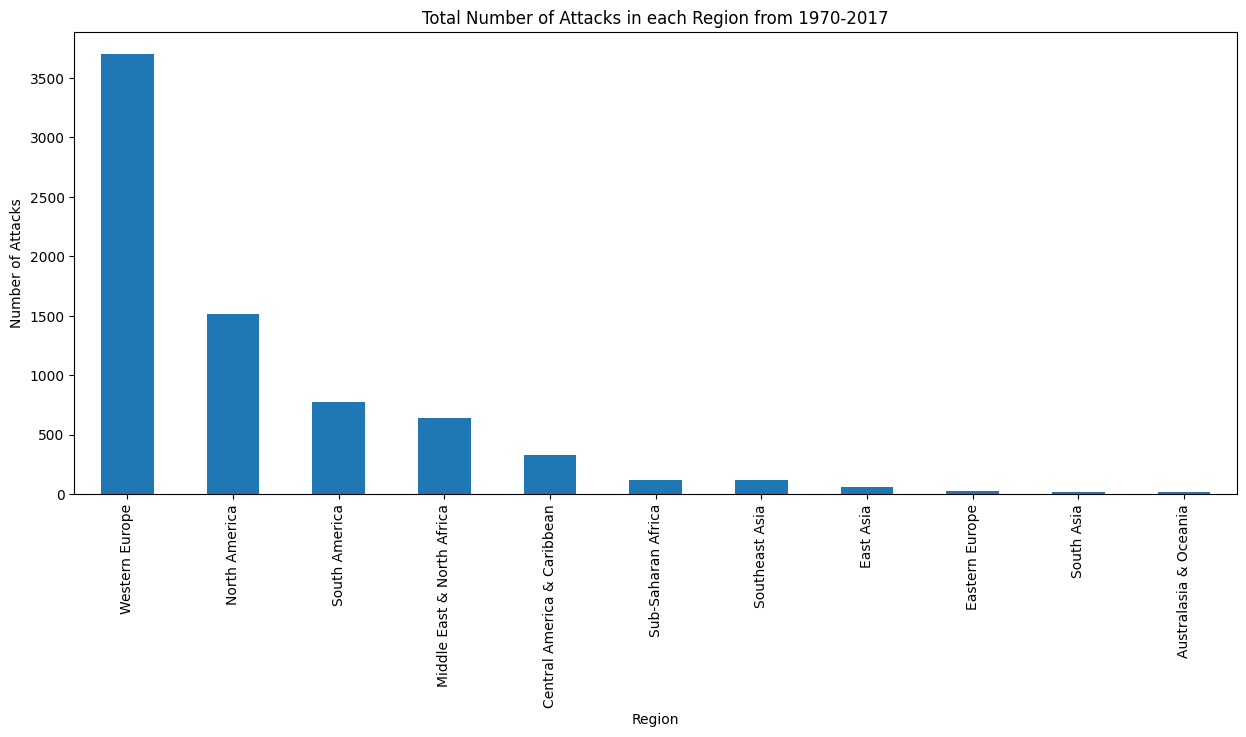

In [ ]:
a.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()



# Top Countries affected by Terror Attacks

In [ ]:
df.Country.value_counts()[:15]

United Kingdom        1407
United States         1406
Italy                  824
Spain                  632
Turkey                 343
Argentina              314
Colombia               282
France                 265
West Germany (FRG)     256
Greece                 134
El Salvador            119
Mexico                 104
Nicaragua              100
Iran                    95
Philippines             76
Name: Country, dtype: int64

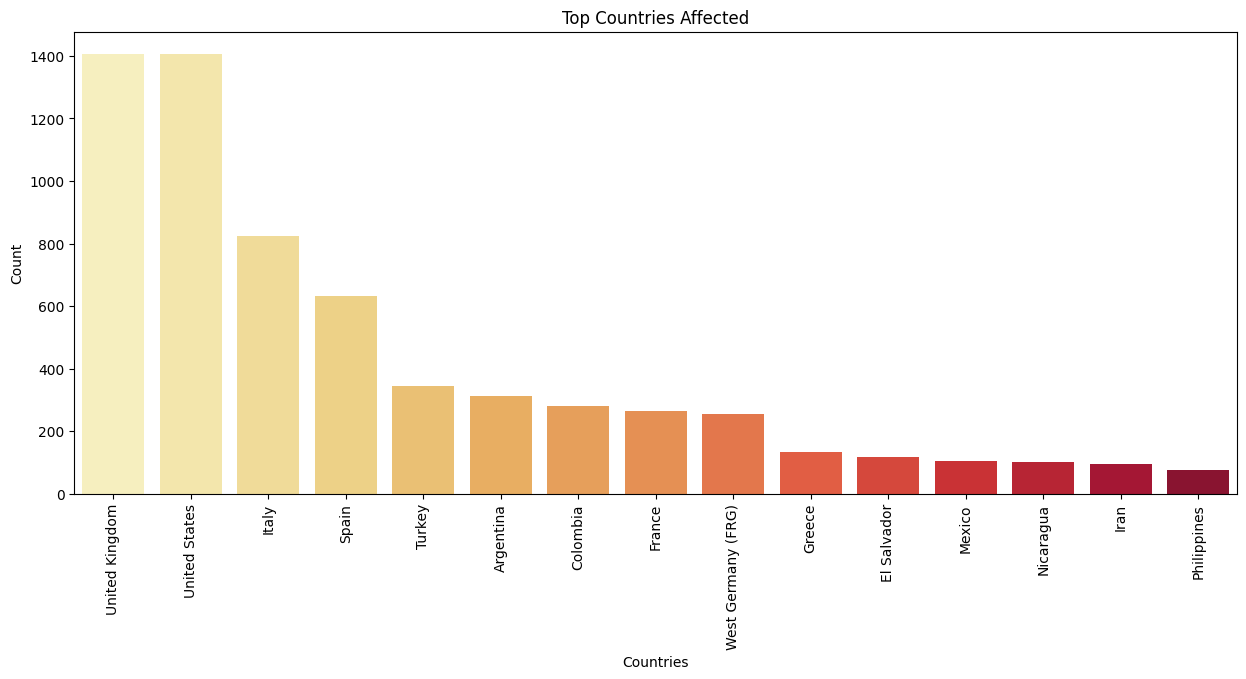

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='YlOrRd')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


# **Customized Data Analysis**

# Terrorist Attacks of a Particular year and their Locations

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1974

In [ ]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList


In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map


In 1970, the American continent accounted for 84% of all terrorist attacks, while the Middle East and North Africa, which are now known as hotspots for conflicts and terrorism, experienced just one terrorist incident during that year.

# Types of terrorist attacks that cause deaths

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 5114


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,1050,1484,1568,454,175,177,113,8,85


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


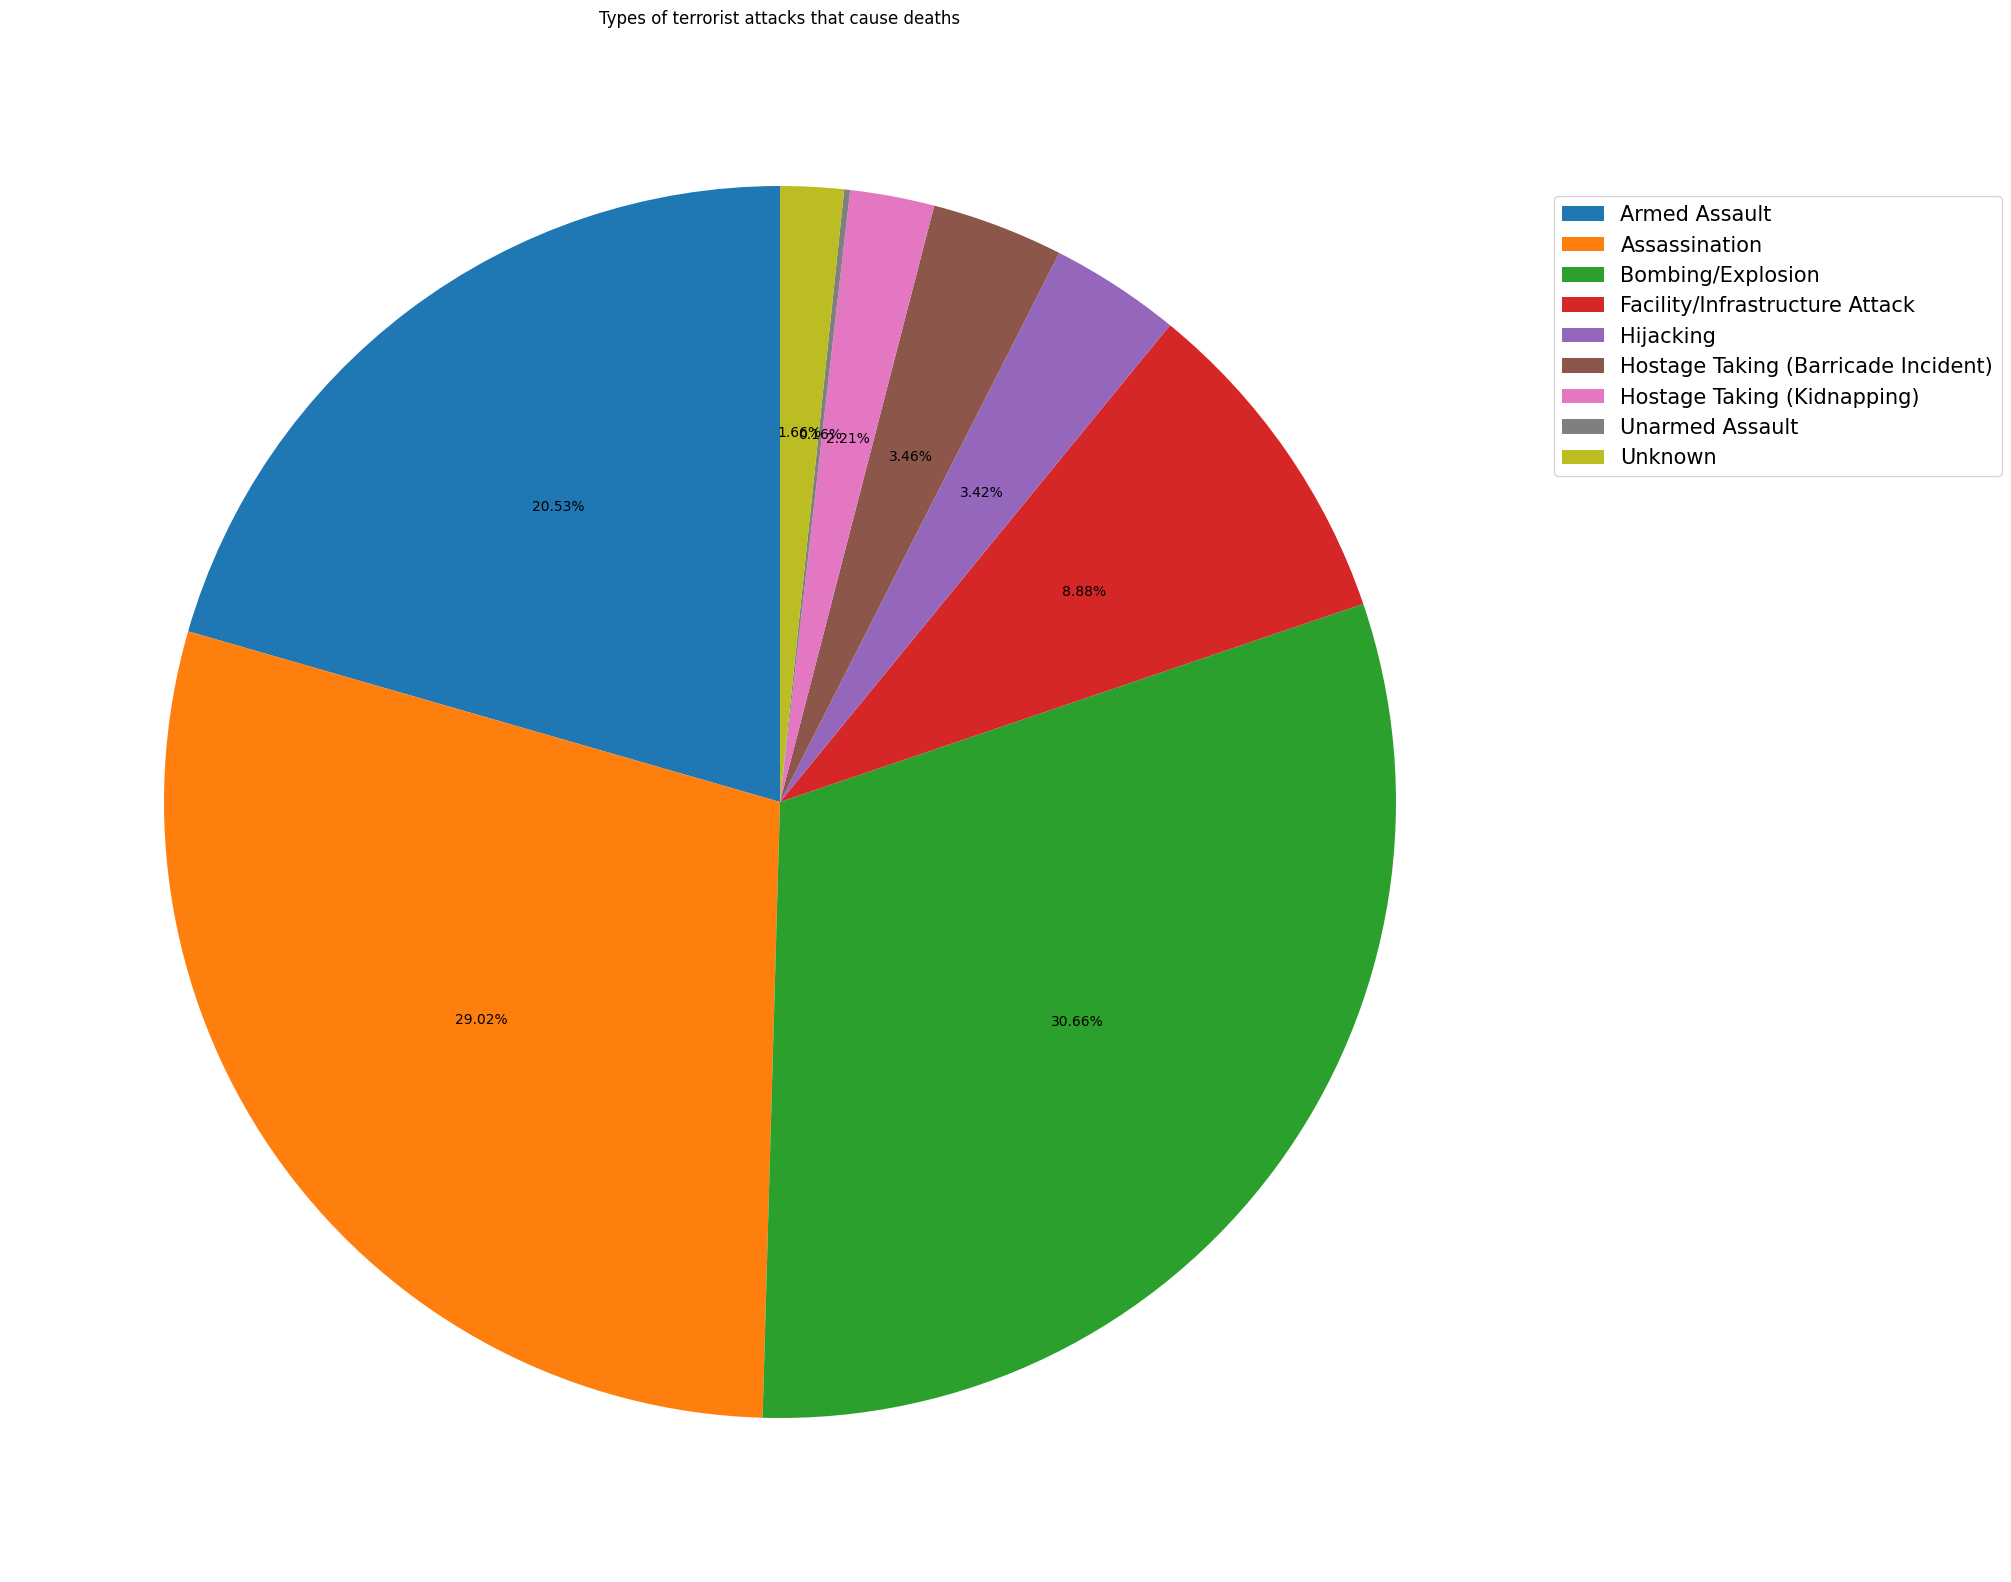

In [ ]:
import numpy as np

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

**The combination of armed assaults and bombings/explosions accounts for a significant portion, specifically 77%, of the fatalities resulting from these attacks. This high fatality rate underscores the recurring use of these tactics in terrorist activities, highlighting the profound threat posed by weapons and explosives on a global scale.**

# Number of People Killed in Terrorist Attacks (By Countries)

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData


Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
Killed,0,0,0,0,317,3,9,0,0,73,...,1638,164,4,2,9,44,0,2,1,5


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

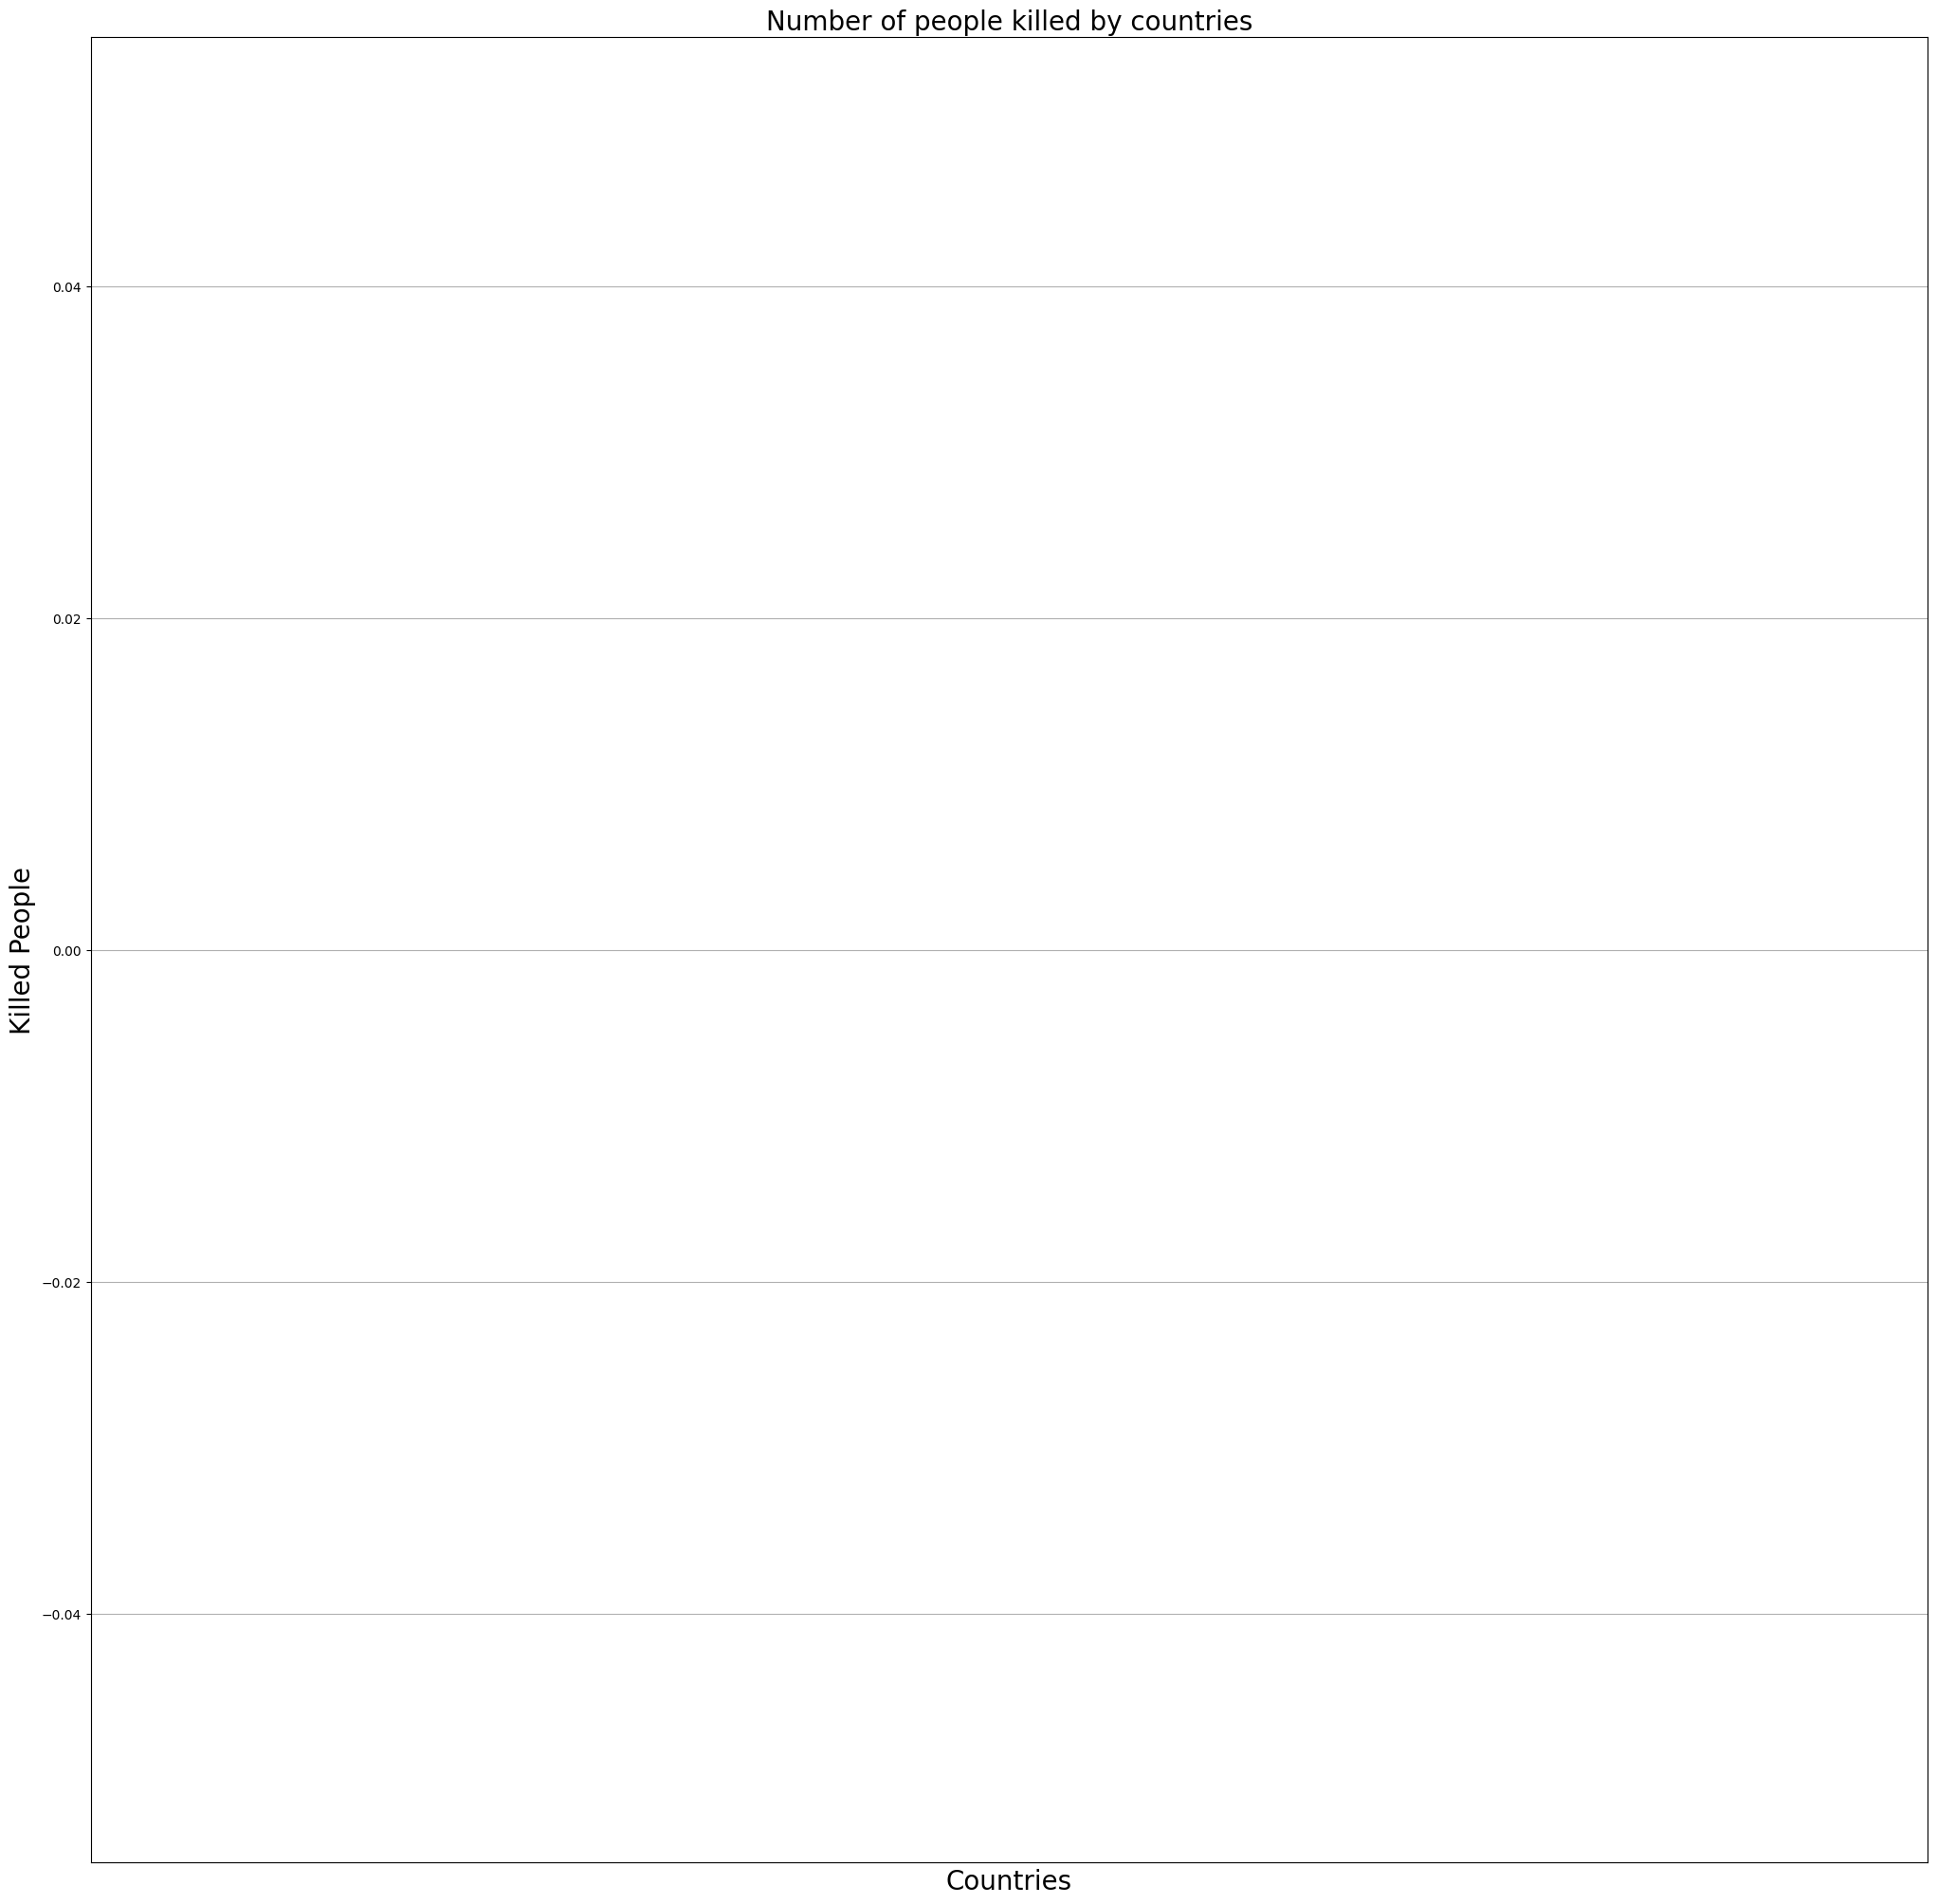

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

# Region Wise Casuality

In [ ]:
c=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
c

,Wounded
Region,
Western Europe,2171
Middle East & North Africa,1523
North America,611
Southeast Asia,456
Sub-Saharan Africa,274
South America,268
Central America & Caribbean,177
East Asia,63
South Asia,29


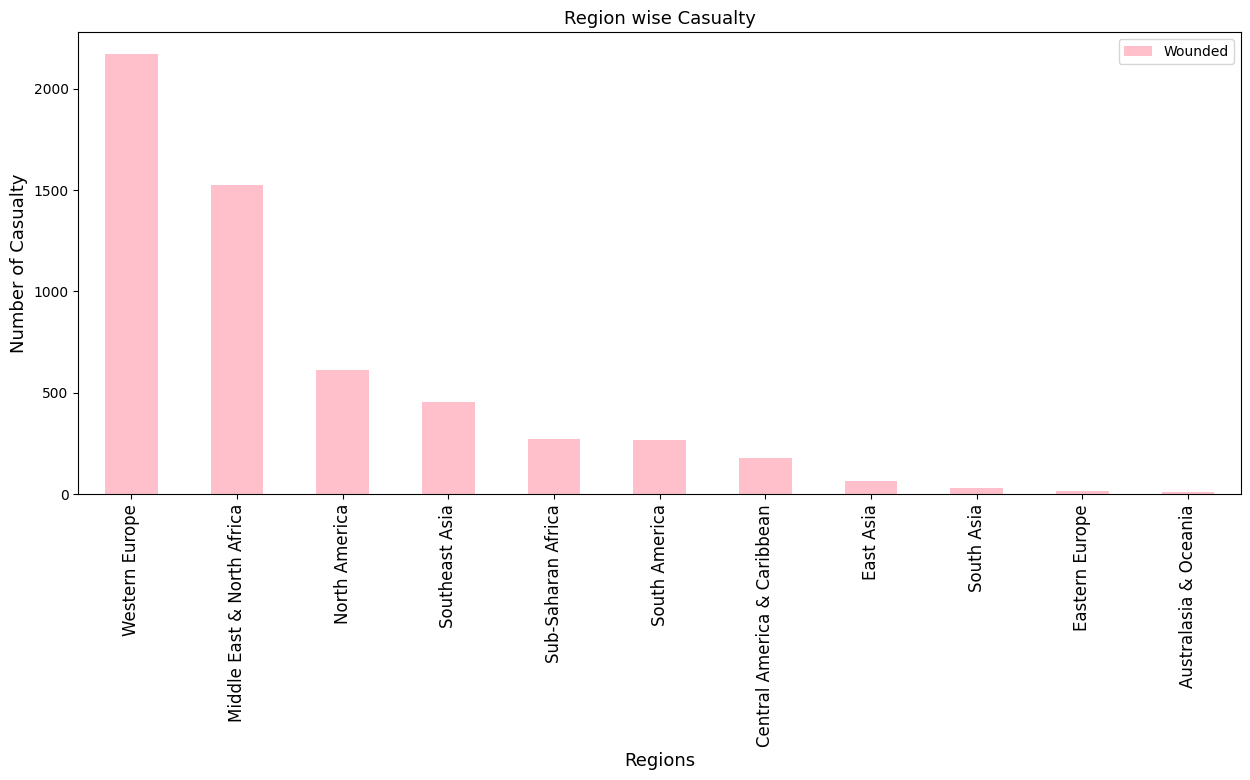

In [ ]:
c.plot(kind="bar",color="pink",figsize=(15,6))
plt.title("Region wise Casualty",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

# People Killed and Wounded In Each Region

In [ ]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Western Europe,2356
Middle East & North Africa,949
South America,472
Southeast Asia,463
Central America & Caribbean,345
North America,245
Sub-Saharan Africa,197
East Asia,35
Eastern Europe,33


In [ ]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Western Europe,2171
Middle East & North Africa,1523
North America,611
Southeast Asia,456
Sub-Saharan Africa,274
South America,268
Central America & Caribbean,177
East Asia,63
South Asia,29


<function matplotlib.pyplot.show(close=None, block=None)>

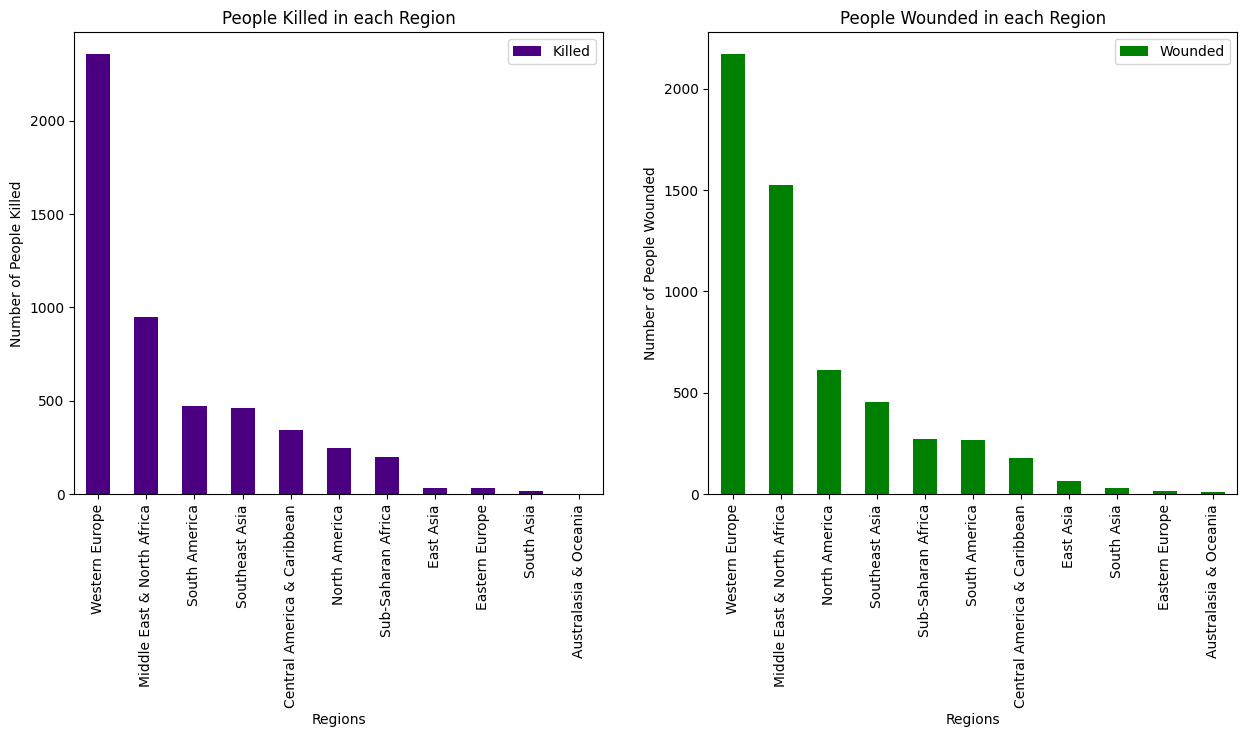

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show